# **Precificação média de imóveis do estado da Califórnia com abordagem de *Data Science* e *Machine Learning***

---


Reprodução do exemplo dado no livro (*Hands On Machine Learning with Scikit Learn and TensorFlow*) com algumas adaptações.

O presente trabalho faz parte de um conjunto de estudo realizado autodidaticamente por Marcelo Arita – autor e proprietário do trabalho.

Contato:

hiroarita@usp.br

[GitHub](https://github.com/marceloarita)

[Linkedin](https://www.linkedin.com/in/marcelo-arita-b0875514b/)

# **Resumo**


---
O trabalho proposto tem como finalidade estudar e criar um modelo preditivo computacional de precificação de imóveis do estado da Califórnia (EUA) com base no censo de 1990. O método utilizado foi a regressão linear multivariável utilizando a linguagem de programação Python bem como a biblioteca do Scikit-Learn de _machine learning_. O objetivo do estudo é criar uma lista de modelos que consiga inferir o preço do imóvel com um erro inferior a 25% para a primeira versão. Os resultados obtidos mostram que o modelo de RandomForest foi o que apresentou melhor performance, atingindo erro na ordem de 23%. O estudo ainda propõe trabalhos futuros que podem ser explorados trazendo melhorias para a acurácia e ao desempenho do código. Finalmente, existe também uma finalidade didática, embora secundária, no que tange ao aprendizado individual do próprio autor.

# **Roteiro**


---


1.   Introdução
2.   Objetivo
3.   Desenvolvimento
4.   Conclusão
5.   Trabalhos futuros




# **1. Introdução**
*Trabalhando com dados reais - o problema da precificação de imóveis*


---

A análise de preço dos imóveis é um problema clássico e muito explorado na área de *Data Science* (DS) e *Machine Learning* (ML). 
Neste estudos será abordado tal problema com dados reais de imóveis do estado da Califórnia do censo de 1990. Não se trata de um dado recente, porém para fins didáticos o mesmo ainda é muito últil.

Estado da Califórnia





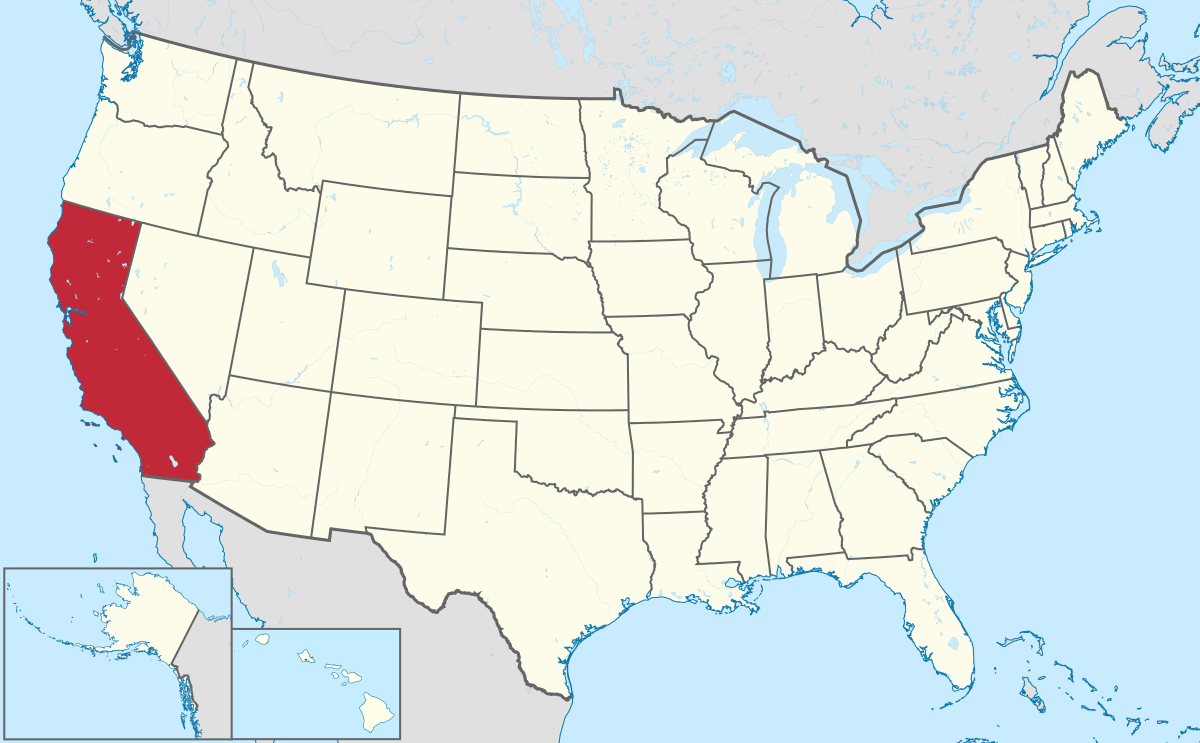

In [0]:
Image('California_in_United_States.svg.png', width = 1000)

##**1.1 Que tipo de abordagem devo utilizar?**

Primeiro devemos nos se questionar que tipo de abordagem de ML será utilizado: aprendizado supervisionado ou não? É um problema do tipo regressão, classificação ou algum outro? 

Dado um conjunto de _labels_ (um gabarito) então trata-se de um caso supervisionado, pois vamos treinar o modelo com essas _labels_. Além disso, é um problema de regressão pois vamos tentar predizer um certo valor numérico. Especificamente, é um problema de regressão multivariável.

# **2. Objetivos**
*A pergunta central: qual o preço médio de um imóvel X de um certo distrito?*

---


O objetivo do estudo é tentar responder à pergunta acima com abordagens de DS e ML.
Ou, em outro sentido, o objetivo é prever o preço médio de imoveis utilizando essas técnicas.

Repare que estamos falando de **preço** e não de **valor** – conceitos distintos entre si (não explicarei aqui a respeito disso).

Sabe-se que a precificação de imóveis é um trabalho realizado por um profissional especialistas da área, na qual possui a expertise em maximilizar o ROI através de um preço ótimo. Ao se tentar responder a pergunta central, em certo sentido, também estamos aproximando da automatização de tarefas.

Como uma métrica de performance, nesta primeira versão do algoritmo  deseje-se obter uma acurácia com erro inferior a 25%. 

# **3. Desenvolvimento**

*Abaixo, os macros tópicos do desenvolvimento*

---

3.1  - Fazendo os settings do Google Colab

3.2  - Carregando dados (CSV) e dando uma rápida olhada na sua estruturação

3.3  - Entendendo os dados - _Big Picture_

3.4  - Criando um *test set* (_dataset_ de teste)

3.5  - Clusterização

3.6  - Explorando e visualizando os dados

3.7  - Analisando correlações lineares

3.8  - Experimentando novas variáveis

3.9  - Preparando os dados para o processo de ML

3.10 - Tratamento customizados

3.11 - Normalização dos dados

3.12 - Selecionando um modelo & Treino

3.13 - Ajustando o modelo

3.14 - Validando o modelo





##**3.1 Fazendo os settings do Google Colab**

In [ ]:
!pip install -q gwpy

In [0]:
%%capture
#Essa parte é apenas settings básicos para integrar o Google Colab com o Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive');


##**3.2 Carregando dados (CSV) e dando uma rápida olhada na sua estruturação**

In [0]:
#Importando dados csv e dando um print nos 10 primeiros dados
import pandas as pd
housing = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Housing_Price/housing.csv')
housing.head(10)
#Os dados estão organizados em colunas e linhas. 
#As linhas são os distritos (ou cidades) da Califórnia. 
#As colunas representam as caracteríticas (ou variável, atributo) referente àquela cidade.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


##**3.3 Entendendo os dados - Big Picture**

 Nesta seção será estudado os dados 'crus' a fim de ter uma visão geral sobre o mesmo. Ao mesmo tempo, vamos buscar alguns _insights_.


In [0]:
housing.info()  #Visualizando as principais infos do dataset.
#Reapare que:
#1. A contagem Non-Null da variável total_bedrooms é igual a 20433. Isso indica que temos dados ausentes (lacunas de NaN).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing.isna().sum()  #Aqui contamos a quantidade de dados ausentes, citados anteriormente.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [0]:
housing.describe() #A função pd.DF.describe() traz algumas descrições básicas estatíticas do dataset como: contagem, 
#variância, min, max, etc.
#Repare que:
#1. A variável 'ocean_proximity' não está nas descrições, pois trata-se de um objeto (em forma de string, no caso).
#2. As percentagens indicam quanto percento está abaixo do valor referente àquela variável. Por exemplo, cerca de 50% 
#das casas possuem preço médio abaixo de $179700.00.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
housing['ocean_proximity'].value_counts() #Aqui vamos visualizar a variável ocean_proximity, quantificando a.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

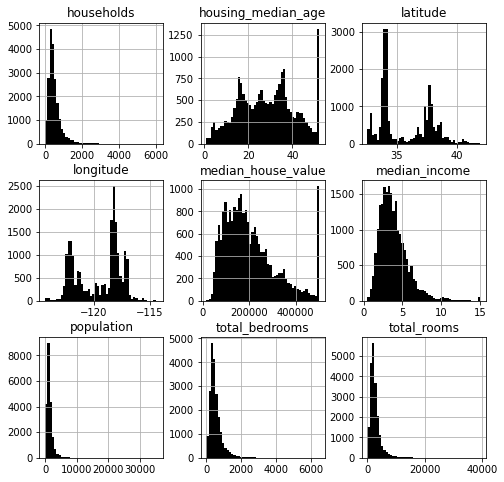

In [0]:
#Plotar histogramas das variáveis numéricas.
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(8,8), color = 'black', histtype='bar')
plt.show()
#O histograma representa o número de ocorrência (eixo y) vs intervalo de valores (eixo x) daquela variável.
#Repare que:
#1. Há muitos histogramas assimétricos (households, median_income, population, etc). Outros de 2 picos;
#2. A variável median_income está em escala reduzida;
#3. As variáveis estão em diferenres escalas. Isso pode se tornar um problema ao algoritmo de ML;
#4. Ainda sobre os histogramas assimétricos, notamos que eles são do tipo com 'calda' tendendo à direita. Isso pode
#dificultar o processo de ML. Adiante, vamos tentar deixar essa distribuição mais simétrica possível (na forma de sino).

###**3.3.1 Discussão**
Agora que fizemos uma rápida análise dos dados crus, temos alguns _insights_ interessantes:

1. Há dados ausentes que precisam ser tratados;
2. Alguns atributos estão com escala normalizada;
3. Muitos histogramas são assimétricos;
4. Exitem variáveis não numéricas;

Outros _insights_ poderão surgir conforme avançamos com análise dos dados.

##**3.4 Criando um *test set* (dataset de teste)**

Por que criar um *test set* voluntariamente? Basicamente, o nosso cérebro é capaz de enxergar e processar padrões. Por isso, quando olhamos um determinado conjunto, poder-se-ia correr o risco de inviezar a si mesmo para utilizar alguma técnica específica. Isso é conhecido como *data snooping bias*. A criação de um _dataset_ de teste é evitar esse viés. É preciso, portanto, elaborar dois conjunto de dados: um para treinar, editar, analisar e outro para fins de teste, estudo de performance etc.


In [0]:
#A biblioteca Scikit-learn possui funções específicas para criar o conjunto de treino e teste.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
#Vale ressaltar um ponto importante aqui: os dados separados, em especial o conjunto de treino, deverá ser o mais próximo da
#realidade com atributos semelhantes a mesma, capaz de represetá-la. 
#Por exemplo: na população brasileira, as mulheres representam cerca de 52% do total. Assim, o conjunto 
#de treino de 100 pessoas deverá conter 52 mulheres e 48 homens. Caso contrário, poderá enviezar a modelagem.

Conversando com um especialista da área de precificação de imóveis, você soube que o atributo da renda média é muito importante para predizer o preço dos imóveis. Então, vamos focar no histograma da renda média (median_income).








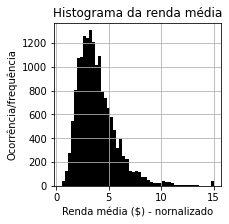

In [0]:
#Plotando o histograma da renda média.
housing['median_income'].hist(bins=50, figsize=(5,5), color = 'black', histtype='bar')
plt.title('Histograma da renda média')
plt.xlabel('Renda média ($) - nornalizado')
plt.ylabel('Ocorrência/frequência')
plt.show()
#Repare que:
#1. É assimétrico, com uma calda à direita;
#2. A maior parte das ocorrências estão compreendidas no intervalo de 1 a 6.

###**3.4.1 Discussão**
A dispersão assimétrica dos dados prejudica o processo de ML. Vamos 'encurtar' a calda direita do histograma. Para isso, será realizado a abordagem de clusterização, a qual os valores serão arredondados para cima e com um limite superior a ser definido.

##**3.5 Clusterização**


In [0]:
#Clusterização.
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) #A função ceil arrendonda para cima
housing["income_cat"].where(housing["income_cat"] < 6, 6.0, inplace=True) #Limite superior = 6.
#Sobre a função pandas.DataFrame.where() >> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html

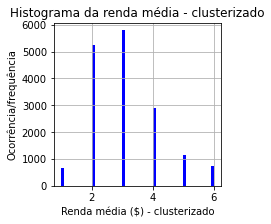

In [0]:
#Plotando o histograma da renda média clusterizado.
housing["income_cat"].hist(bins=50, figsize=(3,3), color = 'blue', histtype='bar')
plt.title('Histograma da renda média - clusterizado')
plt.xlabel('Renda média ($) - clusterizado')
plt.ylabel('Ocorrência/frequência')
plt.show()
#Repare que:
#1. De fato, conseguiu-se diminuir a cauda direita do histograma original;
#2. Definiu-se o valor 6 como limite superior.

In [0]:
#Feito a clusterização, vamos criar uma amostra representativa de treino do nosso conjunto de dados.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing,housing['income_cat']): #X = housing, y = housing['income_cat']
  strat_train_set = housing.loc[train_index] #train_index é um array de números
  strat_test_set = housing.loc[test_index]   #test_index é um array de números
strat_test_set.shape

(4128, 11)

A amostra estratificada (*stratified sampling*) representa um subconjunto do seu _dataset_ estudado. Esse subcojunto deverá ser uma representação mais fiel possível com atributos em escala proporcionais.

In [0]:
#Criando dataframes com alguns coeficientes de interesse para o conjunto overall, random e stratified.
df_strat = ((strat_test_set['income_cat'].value_counts()/len(strat_test_set['income_cat'])).
            rename_axis('Value').reset_index(name='income_cat_Strat')).sort_values(ascending = True, by ='Value')
df_overall = ((housing['income_cat'].value_counts()/len(housing)).
              rename_axis('Value').reset_index(name='income_cat_overall')).sort_values(ascending = True, by ='Value')
df_random = housing.sample(frac = 0.2) 
df_random = ((df_random['income_cat'].value_counts()/len(df_random['income_cat'])).
             rename_axis('Value').reset_index(name='income_cat_random')).sort_values(ascending = True, by ='Value')

In [0]:
#Analisando os diferentes ratios.
result = pd.concat([df_overall,df_random['income_cat_random'],df_strat['income_cat_Strat']], axis = 1)
result['%erro strat'] = (df_overall['income_cat_overall']-df_strat['income_cat_Strat'])/(df_overall['income_cat_overall'])*100
result['%erro radom'] = (df_overall['income_cat_overall']-df_random['income_cat_random'])/(df_overall['income_cat_overall'])*100
result

,Value,income_cat_overall,income_cat_random,income_cat_Strat,%erro strat,%erro radom
5,1.0,0.039826,0.039244,0.039729,0.243309,1.459854
1,2.0,0.318847,0.331153,0.318798,0.015195,-3.859596
0,3.0,0.350581,0.338905,0.350533,0.013820,3.330569
2,4.0,0.176308,0.174419,0.176357,-0.027480,1.071723
3,5.0,0.068944,0.070979,0.069041,-0.140548,-2.951511
4,6.0,0.045494,0.045300,0.045543,-0.106496,0.425985


In [0]:
#Agora que estudamos o erro, podemos remover o atributo 'income_cat' dos dados originais.
for set in (strat_train_set, strat_test_set):
  set.drop(['income_cat'], axis = 1, inplace = True)
set.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 17096 to 8305
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4081 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


####**3.5.1 Discussão**
Foi gasto um tempo para analisar o erro em percentagem da amostra puramente randômica e por amostra estratificada (*stratified sampling*). Nota-se que o erro do primeiro é um pouco superior ao último. Isso mostra que o treino do modelo utilizando o conjunto de dados gerados puramente de forma randômica pode enviezar o modelo. Essa discussão será retomada quando for falar de conceitos de *cross-validation*.

##**3.6 Explorando e visualizando os dados**
Até aqui foi estudado os dados de uma forma superficial. Agora vamos analisar mais a fundo. Novamente, vamos trabalhar apenas com o conjunto de treino.


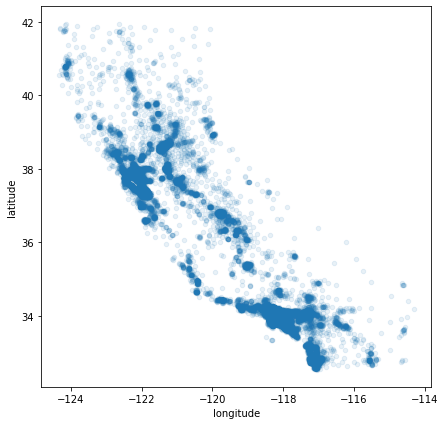

In [0]:
#Vamos fazer um plot geográfico, dado que existe coordenadas de latitude de longitude.
import matplotlib.cm as cm
hounsing = strat_train_set.copy()
viridis = cm.get_cmap('viridis', 8)
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize = (7,7), colorbar = False, alpha = 0.1);
#O parâmetro alpha controla a transparência de modo que podemos visualizar as regiões de maior densidade.
#Repare que:
#1. A densidade de cidades é maior na região litorânea - 
#Regiões onde estão localizadas San Franciso, San Diego, Los Angeles e Santa Barbara

Text(0, 0.5, 'Latitude')

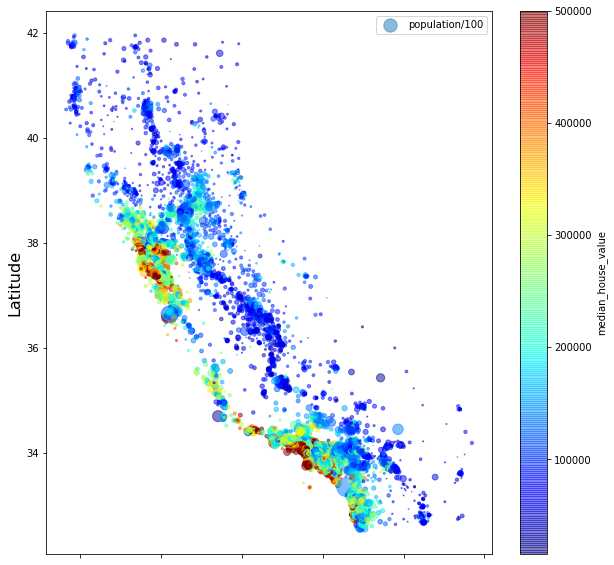

In [0]:
#O plotting anterior pode ser melhorado com a adição de outros atributos disponíveis no conjunto de treino. 
#Vamos utilizar a população e o preço médio dos imóveis.
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize = (10,10), alpha = 0.5, s = housing['population']/100, 
             label = 'population/100', c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True, fontsize = 10)
plt.legend(prop = {'size':10})
plt.xlabel('Longitude', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)

#Parâmetro s: cicunferência da população;
#Parâmetro c: preço médio dos imóveis;

####**3.6.1 Discussão**
A imagem acima nos mostra que a densidade populacional e região geográfica são atributos fortemente ligados com o preço médio do imóvel – o que condiz com a intuição popular (assim como cidades de São Paulo e Rio de Janeiro, por exemplo).
Dito isso, podemoms levantar alguns _insights_ novos:

5. Um algoritmo de clusterização de centros pode ser de grande utilidade (trabalhos futuros);
6. O preço médio dos imóveis é fortemente influenciado por densidade populacional e posição geográfica;
7. Vale fazer uma ressalva quanto à questão geográfica: ao norte do estado essa regra não ocorre, então não é tão simples assim.

##**3.7 Analisando correlações lineares**

Vamos analisar a **correlação linear** entre o preço médio do imóvel com outros atributos.

In [0]:
corr_matrix = housing.corr() #A função corr() faz a análise de correlação linear.
corr_matrix['median_house_value'].sort_values(ascending = False)
#O coeficiente de correlação vaira entre -1 a +1. Quanto mais próximo de 1, mais forte
#é a correlação. O valor negativo, significa que a correlação é inversa e não que seja nula.
#Vale resstaltar que estamos ignorando coeficientes não lineares.

median_house_value    1.000000
median_income         0.688075
income_cat            0.667728
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

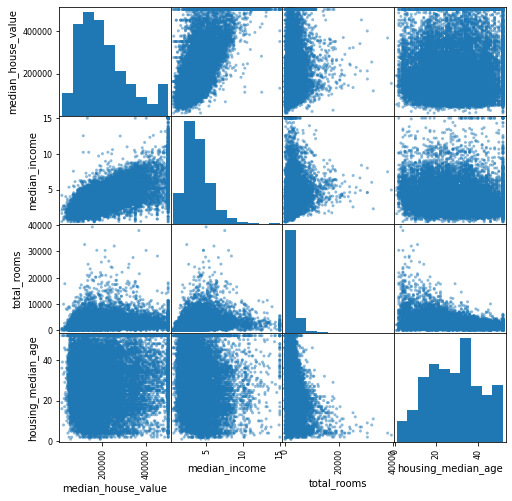

In [0]:
#Outra forma de analisar a correlação linear é visualmente pelo comando pd.DataFrame.scatter_matrix.
#O número de plot será igual a N² com N = número de atributos.
#Por ora, vamos analisar somente 4 correlações (16 plots no total).
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (8,8), diagonal='hist');
#Na diagonal principal temos o histograma (é possível alterar, com diagonal = 'kde', por exemplo).
#Olhando rapidamente o resultado, há comportamento de dispersão em muitos plots.

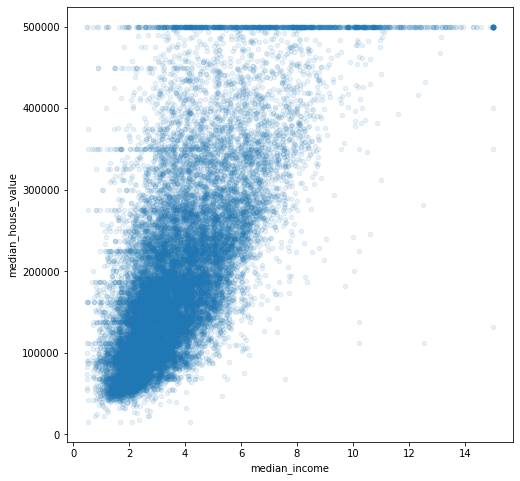

In [0]:
#Como dito anteriormente, a variável renda média influência diretamente no preço médio do imóvel.
#Vamos analisá-lo com mais cuidado.
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1, figsize = (8,8));
#Podemos ver claramente que os dados não estão muito dispersos e há uma correalação linear positiva.
#O plot abaixo possuem algumas linhas 'horizontais': em $500,00; $350,00; $450,000 podemos vê-los. 
#isso pode causar algum bug no processo de ML.

##**3.8 Experimentando novas variáveis**

Antes de preparar os dados para o processo de ML é interessante combinar diferentes atributos. Por exemplo, o atributo total_bedroom por distrito não é usual. Seria mais interessante saber o total de quarto por família (_total_bedroom/household_).

Assim, vamos combinar os atributos para gerar novos:
1. Total de cômodos por família (_total_rooms/households_);
2. Total de quartos por cômodo (_total_bedrooms/total_roomsa_);
3. Pessoas por família (_population/households_).

Em seguida, vamos estudar como essas variáveis criadas anteriormente se relacionam com a nossa variável principal do valor médio do imóvel.

In [0]:
#Criando novas variáveis.
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [0]:
#Em seguida a correlação linear dessas novas variáveis.
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)
#Abaixo, podemos ver que o valor da correlação entre median_house_value x bedrooms_per_room vale ≈ -0.255. 
#Trata-se de uma correlação negativa (inversamente proporcional).
#Portanto, quanto *menor* a razão: bedrooms/room (quartos/cômodos) *maior* será o valor do imóvel! 
#Ou seja, imóveis com bastante cômodos, mas poucos quartos tendem a ser mais caros.'''

median_house_value          1.000000
median_income               0.688075
income_cat                  0.667728
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

####**3.8.1 Discussão**
Esta estapa de combinar novos atributos não precisa, necessariamente, ser feito por completo. O ponto central é fazer combinações rápidas para ganhar alguns _insights_ e depois fazer iterações.

##**3.9 Preparando os dados para o processo de ML**
Nesta altura, está na hora de preparar os dados para o processo de ML. Os principais motivos para isso são:
1. Permite criar algoritmos para reproduzir em outros datasets;
2. Criar funções ou até mesmo biblioteca para reutilizar;
3. Melhoria da performance do código.


In [0]:
#Vamos separar as variáveis de treino preditivo e as labels.
housing = strat_train_set.drop('median_house_value', axis = 1) #Remover a label do dataset de treino preditivo.
housing_labels = strat_train_set['median_house_value'].copy() #Criando a label principal.

####**3.9.1 Valores numéricos**
Como tratar valores numéricos quando existe NaN?

Vamos tratar dos dados faltantes: os NaN do dataframe. Para isso há 3 possibilidades:
1. Se livrar das linhas faltantes;
2. Se livrar da variável inteira (eliminando a coluna);
3. Preencher com média, mediana, etc.

A opção 3 deve se ter cuidado, pois precisamos guardar o *método da média* para aplicar ao _teste_set_.

In [0]:
#Como os valores numéricos são do tipo contínuo (e não discreto), pode-se aplicar o método 3.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median') #Utilizar a média.
housing_num = housing.drop('ocean_proximity', axis = 1) #Removendo dados string.

In [0]:
imputer.fit(housing_num)
#O imputer apenas calcula a média de cada atributo e guarda-os na variável statitics_
imputer.statistics_ #plotando as médias.

array([-118.49 ,   34.26 ,   29.   , 2136.5  ,  435.5  , 1168.   ,
        410.   ,    3.528])

In [0]:
#dir(imputer) #ver os métodos/variáveis do imputer

In [0]:
#Aqui usa-se o método trasnform para aplicar a média nos dados ausentes (NaN)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [0]:
housing_tr.isna().sum()  #Aqui contamos a quantidade de dados ausentes, citados anteriormente.
#Como esperado, não há NaN.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

####**3.9.2 Valores do tipo string**
Como tratar valores do tipo string?
No caso de textos, não é possível calcular a média. Para isso há métodos específicos oferecido pelo Skit-Learn. Vamos abordar alguns desses métodos.

In [0]:
#Método usando LabelEncoder.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
#Com isso, cada valor de texto é convertido em um único número.

array([3, 1, 0, ..., 0, 0, 1])

In [0]:
#O valor '<1H OCEAN' = 0; 'INLAND' = 1....
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


O problema do LabeEncoder é que o algoritmo de ML interpreta valores próximos como se os valores de texto fossem também próximos. O mesmo raciocínio ocorre para valores distantes. Para o presente problema isso não é verdade. 

Vamos usar um outro método chamado de OneHotEncoder sobre o output do LabelEncoder.

In [0]:
#Método usando OneHotEncoder.
#Esse método tranforma texto em vetor.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) #reshape para apicar o método.
housing_cat_1hot.toarray()
#Retorna um array 2D, na qual cada elemento equivale a um vetor associado àquele texto.

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [0]:
#Fazendo o LabelEncoder e OneHotEncoder em um único código:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

##**3.10 Tratamento customizados**
Mais adiante, serão usados alguns métodos como _fit_, _trasnforme_ e _fit_transform_. Entretanto, para cada tipo de tarefa é necessário customizar esses métodos de modo a ter um trablho mais fluido. Algumas dessas customizações podem ser, por exemplo, a adição de novos atributos combinados, como dito anteriormente. 

Vamos criar uma classe que combina novos atributos.

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin #importar as classes.
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6 #indices da coluna.

In [0]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin): #herdou as classes importadas.
  def __init__ (self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y = None):
    return self
  def transform(self, X, y = None):
    rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
    population_per_household = X[:, population_ix]/X[:, household_ix]
    if self.add_bedrooms_per_room:
      add_bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
      return np.c_[X,rooms_per_household, population_per_household, 
                   bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

In [0]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs
#Foi adicionado novos atributos, como pode-se ver abaixo.

array([[-122.14, 37.73, 52.0, ..., 'NEAR BAY', 6.059880239520958,
        2.464071856287425],
       [-120.9, 39.95, 20.0, ..., 'INLAND', 6.645320197044335,
        2.960591133004926],
       [-121.67, 36.58, 11.0, ..., '<1H OCEAN', 7.25615763546798,
        2.8657635467980294],
       ...,
       [-120.61, 35.13, 16.0, ..., '<1H OCEAN', 4.8944365192582024,
        2.5349500713266764],
       [-118.32, 33.97, 52.0, ..., '<1H OCEAN', 6.372759856630824,
        2.849462365591398],
       [-120.95, 37.59, 43.0, ..., 'INLAND', 4.701807228915663,
        2.5963855421686746]], dtype=object)

In [0]:
%%capture
pip install pylatex;

##**3.11 Normalização dos dados**
Conhecido também como _feature_ _scaling_, esse método é utilizado para normalizar as diferentes ordens de grandezas. Em geral, algoritmos de ML não se comportam bem quando existem muitas grandezas distintas. No presente problema, o total de quartos (_total_bedrooms_) varia entre 2 a 40 mil (std altíssimo), enquanto que a média salarial está na em torno de 0 a 15. 
Existem 2 métodos para normalizar os dados:

**1. Min-max scaling**

Esse método é simples: valores originais são convertidos entre 0 a 1. 

A fórmula é dado por:$z_{i}=\frac{x_{i}-min(x)}{max(x)-min(x)}$

com:

- z = valor normalizado;
- x = valor real ou original;
- min = valor mínimo do atributo;
- max = valor máximo do atributo.



**2. Standardization**

Esse método é um pouco diferente: subtrai-se do valor real a média e depois divide-se esse resultado pela variância.

A fórmula é dador por: $z_{i}=\frac{x_{i}-μ}{σ}$


com:
- z = valor normalizado;
- x = valor real ou original;
- μ = média;
- σ = variância.

A vantagem do segundo método é porque é menos vunerável aos efeitos de _outliers_.

Por fim, é importante endossar que o tratamento de dados deve ser realizado apenas no _train set_ e não nos dados completos (quando há o _test set)_.

Antes de proceguir, vamos introduzir o conceito de **Pipeline**.

####**3.11.1. Pipeline**

Muitos códigos de ML são ensinados por meio do paradigma de programação procedural, na qual cada etapa do código é feita em sequência, seguindo uma ordem específica e usando funções, pacotes etc. Códigos escritos dessa forma não são os melhores para serem posto em produção visto que, em geral, não permitem a criação de um padrão de escrita que seja de fácil entendimento e manutenção.

A classe Pipeline oferecido pelo Scikit-Learn ajuda a criar códigos que possuam padrões fáceis de serem assimilados. Em sua essência, esse tipo de código usa o estilo de POO. Mais a *respeito→*[link]( https://medium.com/data-hackers/como-usar-pipelines-no-scikit-learn-1398a4cc6ae9).

Vamos usar a classe Pipeline para fazer a normalização dos dados.

####**3.11.2. Normalização com Pipeline**

In [0]:
#Importar as classes.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
#Este pipeline é somente para variáveis numéricas. Mais à frente, vamos fazer para variáveis de texto (strings)
num_pipeline = Pipeline(steps = [('imputer', imputer), 
                                 ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
                                 ('std_scaler', StandardScaler())])
#A Pipeline é composta por uma lista de name/estimator em uma sequência definida. 
#O output de uma etapa é o imput da outra e assim sucessivamente, até chegar no último estimator que deverá
#ser um transformator (que possui o método fit_trasnform()). Os nomes podem ser dado arbitrariamente.
#Nese exemplo, o último estimator/transformator é o StandardScaler

In [0]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
#Quando o método fit() da Pipeline é chamada, automaticamente todos os métodos fit_transform() dos transformers
#são chamados e o output de cada etapa é o imput da seguinte etapa e assim sucessivamente.
#Ao final do último estimator/trasnformator é chamado o seu método fit().

In [0]:
%%capture
#Neste pipeline será incluso o tratamento das variáveis de texto.
from sklearn.base import BaseEstimator, TransformerMixin
!pip install sklearn_features
from sklearn_features.transformers import DataFrameSelector


In [0]:
#Para unir a Pipeline numérica com a de texto, é preciso importar FeatureUnion.
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num) #pegando os indices da variável numérica.
cat_attribs = ['ocean_proximity'] #variável de texto.

In [0]:
#StackOverflow
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=None):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=None):
        return self.encoder.transform(x)

In [0]:
#Pipeline numérica.
num_pipeline = Pipeline(steps = [('selector', DataFrameSelector(num_attribs)),
                                 ('imputer', imputer),
                                 ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
                                 ('std_scaler', StandardScaler())])
#Pipeline de texto.
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                                ('label_binarizer', MyLabelBinarizer()),
                                ])
#Pipeline completa.
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline),
                                               ])

In [0]:
#Testando a Pipeline completa.
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.28565691,  0.98485568,  1.8717405 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.66703332,  2.0248587 , -0.67933328, ...,  0.        ,
         0.        ,  0.        ],
       [-1.05117861,  0.44611538, -1.39682278, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.52235522, -0.23316588, -0.9982175 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62010286, -0.77659088,  1.8717405 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.69197782,  0.9192699 ,  1.154251  , ...,  0.        ,
         0.        ,  0.        ]])

####**3.11.3. Discussão**
Agora que os dados numéricos e de texto foram tratados (normalizados), podemos avançar para fase final de treino do modelo.**bold text**

##**3.12 Selecionando um modelo & Treino**
Após 
1. Entender os dados (seção 3.3);
2. Criar um conjunto de teste (3.4);
3. Explorar od dados (3.6);
4. Análisar correlações (3.7);
5. Combinar novos atributos (3.8);
6. Tratar dados ausentes (3,9);
7. Por fim, criar uma Pipeline completa de normalização (3.11-3.12);

Podemos finalmente criar alguns modelos de ML e treiná-los. Em seguida, será feito uma análise iterativa para melhorar a performance.

####**3.12.1. Salvar e registrar o modelo**
Depois de treinar o modelo é acoselhável salvar e resitrar o seu desempenho. Isso permite que os versione além de conseguir compará-los entre si. Para isso, existe biblioteca `joblib ` que usaremos a diante.


In [0]:
import joblib

####**3.12.1. Modelo 1 - Regressão Linear**


In [0]:
#Vamos utilizar a regressão linear.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels) #treinando o modelo.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
results = lin_reg.predict(some_data_prepared)
df = pd.DataFrame(results, columns = ['Linear Regression']).apply(np.ceil) #arredondando para cima.
s = some_labels.to_frame().reset_index()
s = pd.DataFrame(s.loc[:,'median_house_value'])
df = pd.concat([df, s], axis = 1)
df['Difference'] = df['Linear Regression']-df['median_house_value']
df.head(10)

,Linear Regression,median_house_value,Difference
0,300360.0,264700.0,35660.0
1,76338.0,96600.0,-20262.0
2,316554.0,291800.0,24754.0
3,243125.0,191100.0,52025.0
4,118278.0,53500.0,64778.0
5,283344.0,242200.0,41144.0
6,228627.0,225000.0,3627.0
7,201604.0,170500.0,31104.0
8,135634.0,150000.0,-14366.0
9,178457.0,99800.0,78657.0


In [0]:
#vamos medir a acurácia pela raiz do erro médio.
import math as mt
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse  = mt.ceil(lin_rmse)
lin_rmse

68637

In [0]:
#Salvando e resgistrando o modelo
filename = 'Linear_regression_.sav'
joblib.dump(lin_reg, filename)

['Linear_regression_.sav']

Repare nesse trecho do código:

```
lin_reg.fit(housing_prepared,housing_labels) #treinando o modelo.
lin_reg.predict(housing_prepared)
```
Estamos usando o mesmo conjunto de dados _housing_prepared_ como argumentos. Por que? Porque vamos analisar conceitos como _underfitting_ e _overfitting_.

O modelo de regressão linear não está com boa acurácia. Com um erro na ordem de 60000, significa que o modelo não está bem treinado (_underfitting_).
Quando isso acontece, pode significar que os atributos não são suficientes para fazer boas predições ou que o modelo não é robusto. O que pode ser feito para melhorar o desempenho do algoritmo é testar combinações de atributos etc. Mas em primeiro plano é interessante testar outros modelos para, posteriormente, torná-los mais robustos.

####**3.12.2. Modelo 2 - Regressão por árvore de decisão**


In [0]:
#Árvores de decisões (decision tree) são capazes de achar relações não lineares.
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels) #Conjunto de treino.
housing_predictions = tree_reg.predict(housing_prepared) #Usando o mesmo conjunto de treino.
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#Raiz do erro médio.

0.0

Aqui temos um exemplo oposto ao anterior com um caso de _overfitting_. Isso significa que o modelo 'decorou' os resultados, mas não aprendeu. É impossível que o modelo tenha erro 0. Assim, antes de utilizar datasets de teste, é melhor testar outros meios de validações.

####**3.12.3. Cross-Validation**
O método descrito a seguir é chamado de _K-fold cross-validation_ que reparte os dados de treino em X distintos subsets randomicamente chamados de _folds_. Um desses subsets é utilizado para teste e os demais para treino até que o modelo seja treinado e testado com todas as partes.

A acurácia é calculado pema média dos testes.

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
results = cross_val_predict(tree_reg, housing_prepared,housing_labels, cv = 10)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10) #para X = 10.
rmse_scores = np.sqrt(-scores)

In [0]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
df = pd.DataFrame(results, columns = ['Decision Tree Regression']).apply(np.ceil) #arredondando para cima.
s = some_labels.to_frame().reset_index()
s = pd.DataFrame(s.loc[:,'median_house_value'])
df = pd.concat([df, s], axis = 1)
df['Difference'] = df['Decision Tree Regression']-df['median_house_value']
df.head(10)

,Decision Tree Regression,median_house_value,Difference
0,180100.0,264700.0,-84600.0
1,114200.0,96600.0,17600.0
2,348300.0,291800.0,56500.0
3,163300.0,191100.0,-27800.0
4,86600.0,53500.0,33100.0
5,248700.0,242200.0,6500.0
6,260700.0,225000.0,35700.0
7,150500.0,170500.0,-20000.0
8,112700.0,150000.0,-37300.0
9,108600.0,99800.0,8800.0


In [0]:
#Vamos printar o socores bem como a sua média.
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(rmse_scores)

Scores: [74904.98694134 69773.17302351 69111.52672412 72878.85411106
 70178.85422389 74202.2118931  71051.08639089 70048.07045338
 71003.73493757 70884.66088343]
Mean: 71403.71595822707
Standard deviation: 1845.836501802784


In [0]:
#Salvando e resgistrando o modelo
filename = 'tree_regression_.sav'
joblib.dump(tree_reg, filename)

['tree_regression_.sav']

In [0]:
#Utilizando cross-validation para o modelo 1 de regressão linear.
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71235.17039596 68261.61427961 66790.50205044 67898.41928113
 69819.87717545 71726.96025353 68380.08910707 66891.41212363
 67660.79808484 70298.67291196]
Mean: 68896.35156636129
Standard deviation: 1671.7681573387458


Como pode-se observar nos resultados obtidos anteriormente para os dois modelos, a performance da árovere de decisão ficou ligeiramente inferior à da regressão linear.

####**3.12.4. Modelo 3 - Random Forest Regressor**

In [0]:
#Este último modelo é muito mais robusto que os anteriores.
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52369.58707567 48551.54853115 48859.43683098 51579.71763757
 50908.82707267 53373.83342494 49180.43279866 49585.73679531
 50636.88086248 49671.49840186]
Mean: 50471.74994312746
Standard deviation: 1511.6024674433854


In [0]:
#Cálculo da raiz do erro médio
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

18618.35293279705

In [0]:
#Salvando e resgistrando o modelo
filename = 'random_forest_regression_.sav'
joblib.dump(forest_reg, filename)

['random_forest_regression_.sav']

Reapare que o valor da raiz do erro médio é inferior ao valor da média do score obtido pelo cross-validation. Isso significa que o modelo 3 ainda possui _overfitting_.

Não é viável gastar tempo com novos atributos. Objetivo aqui é obter um shortlist de modelos.

##**3.13 Ajustando o modelo**
Com uma shortlist de modelos, está na hora de ajustá-los. Vamos ver algumas técnicas para isso.

####**3.13.1. Grid Search**
A combinação de atributos pode ser feito manualmente, porém gasta-se muito tempo ao optar por esse meio. Para tanto, o Scikit-Learn oferece GridSearchCV na qual consegue realizar, de modo sistemático, diversas comninações retornando uma combinação potencial em um único objeto.

Tudo que precisamos fazer é dizer quais atributos deseja-se combinar e com quais valores deseja-se tentar.





In [0]:
%%capture
#Vamos utilizar o GridSearchCV com RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
              ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)
#Primeiro, o gridsearch vai tentar com 3x4 = 12 combinções possíveis do primeiro elemento do dicionário
#em seguida, vai para o segundo elemento 2x3 = 6 combinações, mas com o parâmetro booststrap = False.
#Ao todo serão 12+6 = 18 combinações feitas.

In [0]:
#A variável best_estimator_ armazena a melhor combinação
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
  print(np.sqrt(-mean_score),params)
  #o melhor resultado é dador por: 49466.719434310944 {'max_features': 6, 'n_estimators': 30}


62949.83007221256 {'max_features': 2, 'n_estimators': 3}
55033.745402105495 {'max_features': 2, 'n_estimators': 10}
52435.96485597313 {'max_features': 2, 'n_estimators': 30}
59694.5187848372 {'max_features': 4, 'n_estimators': 3}
52292.233748488004 {'max_features': 4, 'n_estimators': 10}
50376.39130880632 {'max_features': 4, 'n_estimators': 30}
59465.1037186004 {'max_features': 6, 'n_estimators': 3}
51915.84183536253 {'max_features': 6, 'n_estimators': 10}
49612.679229042435 {'max_features': 6, 'n_estimators': 30}
58290.66767188243 {'max_features': 8, 'n_estimators': 3}
52481.98687994475 {'max_features': 8, 'n_estimators': 10}
50144.47081706745 {'max_features': 8, 'n_estimators': 30}
61625.87271404348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53760.93590653676 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59410.967820079124 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51708.13962648455 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [0]:
#O RandomForestRegressor pode indicar a importância de cada atributo. 
#Vamos ver quais atributos são mais importantes no sentido da predição de dados.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.58968094e-02, 7.46331502e-02, 4.57724715e-02, 1.93871935e-02,
       1.80167860e-02, 1.99030823e-02, 1.77687951e-02, 3.61696109e-01,
       7.87828843e-02, 1.05806773e-01, 1.55067902e-02, 1.41783765e-01,
       2.19835790e-04, 7.77904538e-03, 7.04650894e-03])

In [0]:
#Vamos ver a corespondente variável.
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3616961094935521, 'median_income'),
 (0.1417837654063465, '<1H OCEAN'),
 (0.10580677251931256, 'pop_per_hhold'),
 (0.08589680938129121, 'longitude'),
 (0.07878288432174621, 'rooms_per_hhold'),
 (0.07463315019678152, 'latitude'),
 (0.0457724714704669, 'housing_median_age'),
 (0.019903082314406743, 'population'),
 (0.019387193534061715, 'total_rooms'),
 (0.018016785960370728, 'total_bedrooms'),
 (0.017768795109455476, 'households'),
 (0.015506790181543368, 'bedrooms_per_room'),
 (0.007779045383509977, 'ISLAND'),
 (0.007046508937137399, 'NEAR BAY'),
 (0.00021983579001779997, 'INLAND')]

Com essa informação é possível droppar alguns atributos de baixa importância, tal como 'ISLAND', 'NEAR BAY' etc.

##**3.14 Validando o modelo**
Após criar uma shortlist de modelos e ver quais possuem um bom desepenho, foi feito o ajuste do melhor. Agora está na hora de validar esse modelo com um conjunto de teste.

Não há nada de novidade no processo: apenas vamos repetir alguns passos anteriores.

In [0]:
final_model = grid_search.best_estimator_ #utilizando RandomForestRegressor
X_test = strat_test_set.drop("median_house_value", axis=1) #Teste set
y_test = strat_test_set["median_house_value"].copy() #Label
X_test_prepared = full_pipeline.transform(X_test) #Aplicando o pipeline completo
final_predictions = final_model.predict(X_test_prepared) #Predict
final_mse = mean_squared_error(y_test, final_predictions) #Calculando a raiz do erro médio
final_rmse = np.sqrt(final_mse)
final_rmse

47430.259998446

# **4. Conclusão**
*A reposta da pergunta central*

---
O estudo de precificação de imóveis com abordagens de DS e ML foi didida em dois grandes processos:
1. Estudar e compreender os dados com base em informações estatísticas e visualização gráfica a fim de obter alguns _insights_.
2. Com uma breve noção do que os dados estão mostrando, foi feito o preparo/tratamento dos dados para aplicar técnicas de ML.

Na primeira etapa, cocluiu-se que existem atributos que influênciam fortemente os preços dos imóveis, tais como: renda média; proximidade com a praia e densidade populacional.

Na segunda parte foi criado 3 modelos de ML: Regressão linear, Decision Tree e RandomForest sendo que este último apresentou melhor performance, apesar de exibir sinais de _underfitting_. 

A medida da perfomance foi baseada em dois métodos: MSE e cross-validation para análise de comportamentos de _underfitting_ e _overfitting_.

A pergunta central pode ser respondida com margem de erro médio de 49 mil dólares. Considerando que a média dos preços dos imóveis é de 208 mil dólares, o erro representa cerca de 23% – valor um pouco elevado porém dentro do esperado de 25% definido como objetivo.

# **5. Trabalhos futuros**
*Perspectivas*

---
1. Modelo com Support Vector Machine Regressor;
2. Testar RandomizedSearchCV;
3. Alterar a Pipeline para utilizar apenas as features mais importantes;
4. Criar uma Pipeline que faça predição ao final;
5. Explocar recursos do GridSearchCV.
6. Estudar métricas diferentes métricas de performance.